<a href="https://colab.research.google.com/github/Dhairya18498/MIE1624_Assignment2/blob/main/parmar_1006859516_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Notebook

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir('drive/MyDrive/UofT/MIE1624_Intro_to_DS&Analytics/Assignment2')
# !pwd

In [3]:
# cwd = os.getcwd()
# files = os.listdir(cwd)
# for f in files:
#   print(f)

In [4]:
!git clone https://github.com/Dhairya18498/MIE1624_Assignment2.git

fatal: destination path 'MIE1624_Assignment2' already exists and is not an empty directory.


In [5]:
%cd MIE1624_Assignment2/
!ls

/content/MIE1624_Assignment2
clean_kaggle_data_2022.csv	       parmar_1006859516_assignment2.ipynb
kaggle_survey_2022_answer_choices.pdf  README.md
MIE1624-Assignment-2-Winter2023.pdf


# Importing Kaggle Survey Data

Let's begin by importing the data,

In [6]:
import pandas as pd
# from IPython.display import HTML

survey_df = pd.read_csv('clean_kaggle_data_2022.csv', encoding = 'latin1')

# survey_df_html = survey_df.to_html()
# display(HTML(survey_df_html))

survey_df.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


After having a look on the DataFrame, it can be seen that the first column "Duration (in seconds)" represent the amount of time in seconds the respondent took to complete the survey, which is irrelevant in the task of predicting the respondent's yearly compensation, hence it is dropped in the following cell. Also the first row of the DataFrame describes what the question is, we can remove that row and store it in a separate DataFrame, to have a mapping of the question numbers and their descriptions

In [7]:
from IPython.display import HTML
survey_df.drop(columns = [survey_df.columns[0]], inplace = True) ### since duraation of survey is not a relevant feature
survey_ques = pd.DataFrame(survey_df.loc[0])
survey_df.drop(0, inplace = True)
survey_ques.reset_index(inplace = True)
survey_ques_html = survey_ques.to_html()
display(HTML(survey_ques_html))

,index,0
0,Q2,What is your age (# years)?
1,Q3,What is your gender? - Selected Choice
2,Q4,In which country do you currently reside?
3,Q5,"Are you currently a student? (high school, university, or graduate)"
4,Q6_1,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera
5,Q6_2,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX
6,Q6_3,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses
7,Q6_4,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp
8,Q6_5,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai
9,Q6_6,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity


# Data Exploration

In [8]:
survey_Q29 = survey_df[['Q29', 'Q29_Encoded', 'Q29_buckets']]
survey_Q29

,Q29,Q29_Encoded,Q29_buckets
1,"25,000-29,999",2.0,"20,000-29,999"
2,"100,000-124,999",10.0,"100,000-124,999"
3,"100,000-124,999",10.0,"100,000-124,999"
4,"200,000-249,999",13.0,"200,000-299,999"
5,"200,000-249,999",13.0,"200,000-299,999"
...,...,...,...
8132,"100,000-124,999",10.0,"100,000-124,999"
8133,"2,000-2,999",0.0,"0-9,999"
8134,$0-999,0.0,"0-9,999"
8135,"25,000-29,999",2.0,"20,000-29,999"


In [9]:
import numpy as np
bucket_codes = list(np.unique(survey_Q29['Q29_Encoded']))
bucket_codes

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0]

In [10]:
code_bucket_dict = {}
for code in bucket_codes:
  if isinstance(code, float):
    print(code, '--', survey_Q29.loc[survey_Q29.index[survey_Q29['Q29_Encoded'] == code][0], 'Q29_buckets'])
    code_bucket_dict[code] = survey_Q29.loc[survey_Q29.index[survey_Q29['Q29_Encoded'] == code][0], 'Q29_buckets']

0.0 -- 0-9,999
1.0 -- 10,000-19,999
2.0 -- 20,000-29,999
3.0 -- 30,000-39,999
4.0 -- 40,000-49,999
5.0 -- 50,000-59,999
6.0 -- 60,000-69,999
7.0 -- 70,000-79,999
8.0 -- 80,000-89,999
9.0 -- 90,000-99,999
10.0 -- 100,000-124,999
11.0 -- 125,000-149,999
12.0 -- 150,000-199,999
13.0 -- 200,000-299,999
14.0 -- >300,000


In [11]:
for column in list(survey_df.columns[survey_df.columns.str.contains('Q10')]):
  print(column, '--', np.unique(survey_df[column].astype(str)))

Q10_1 -- ['Yes, the research made advances related to some novel machine learning method (theoretical research)'
 'nan']
Q10_2 -- ['Yes, the research made use of machine learning as a tool (applied research)'
 'nan']
Q10_3 -- ['No' 'nan']


In [12]:
survey_df['Q5'].value_counts()

No    8136
Name: Q5, dtype: int64

In [13]:
survey_df['Q26'].value_counts

<bound method IndexOpsMixin.value_counts of 1       2-Jan
2         20+
3         20+
4         20+
5       4-Mar
        ...  
8132      20+
8133    2-Jan
8134        0
8135        0
8136        0
Name: Q26, Length: 8136, dtype: object>

#Reason for Dropping these columns??
After doing some data exploration and reading the question descriptions, some questions were found irrelevant in the task of predicting a respondent's yearly compensation and some questions had incorrect entries. Following are brief reasons why the corresponding questions were dropped,

Q5 - None of the respondents are students

Q6 - Not Relevant since it doesn't matter what platform the respondent used to gain knowledge, sure having done university courses provides some level of credibilty but there are other questions that cover this

Q7 - Not Relevant since it's a subjective (opinion) choice

Q26 - Incorrect Entries

Q29 - Not needed since we have Q29_Encoded and Q29_buckets

Q30 - Not Relevant since the amount of money spent on the resources by the respondent has no relation to their yearly compensation

And all question relating to the choice "Other" since they don't provide any relevant information

In [14]:
cols_to_drop = ['Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7',
                'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12','Q7_1', 'Q12_15', 
                'Q13_14', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 
                'Q14_16', 'Q15_15', 'Q17_15', 'Q26', 'Q18_14', 'Q19_8', 'Q20_6', 
                'Q28_8','Q29', 'Q30', 'Q31_12', 'Q32', 'Q33_5', 'Q34_8', 
                'Q35_16', 'Q36_15', 'Q37_13', 'Q38_8', 'Q39_12', 'Q40_15', 
                'Q41_9', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 
                'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10','Q44_11', 'Q44_12']

In [15]:
survey_df = survey_df.drop(columns = cols_to_drop)

# Encoding Categorical Features
The following code encodes the questions with Multiple Choices `(Q10_1, Q10_2, ...,  Q12_1, Q12_2, ... etc.)` in the following manner

'nan' values are replaced by `'0.0'`s and the choices are converted to `'1.0'`s

since all the multiple choice questions have a separate column for every choice they are already sort of encoded, we just need to convert the choices and 'nan's to a compatible format, by changing the choices to `1.0`s and 'nan's to `0.0`'s we are essentially **one-hot encoding** the Multiple Choice Questions

In [16]:
MCQ_list = []
MCQ_cat_list = []
for q in range(2, 45):
  if len(list(survey_df.columns[survey_df.columns.str.contains('Q'+str(q)+'_')])) > 1:
    MCQ_list.append('Q'+str(q))
    for column in list(survey_df.columns[survey_df.columns.str.contains('Q'+str(q))]):
      if len(np.unique(survey_df[column].astype(str))) <= 2:
        # print(column, '--', np.unique(survey_df[column].astype(str)))
        MCQ_cat_list.append(column)
MCQ_list.remove('Q29')

In [17]:
MCQ_list

['Q10',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q28',
 'Q31',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42']

In [18]:
MCQ_cat_list

['Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_13',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_15',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_8',
 'Q18_9',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q19_1',
 'Q19_2',
 'Q19_3',
 'Q19_4',
 'Q19_5',
 'Q19_6',
 'Q19_7',
 'Q20_1',
 'Q20_2',
 'Q20_3',
 'Q20_4',
 

In [19]:
MCQ_dict = {}
for i in range(len(MCQ_list)):
  MCQ_dict[MCQ_list[i]] = []
  for col in MCQ_cat_list:
    if MCQ_list[i] in col:
      MCQ_dict[MCQ_list[i]].append(col)

MCQ_dict

{'Q10': ['Q10_1', 'Q10_2', 'Q10_3'],
 'Q12': ['Q12_1',
  'Q12_2',
  'Q12_3',
  'Q12_4',
  'Q12_5',
  'Q12_6',
  'Q12_7',
  'Q12_8',
  'Q12_9',
  'Q12_10',
  'Q12_11',
  'Q12_12',
  'Q12_13',
  'Q12_14'],
 'Q13': ['Q13_1',
  'Q13_2',
  'Q13_3',
  'Q13_4',
  'Q13_5',
  'Q13_6',
  'Q13_7',
  'Q13_8',
  'Q13_9',
  'Q13_10',
  'Q13_11',
  'Q13_12',
  'Q13_13'],
 'Q14': ['Q14_1',
  'Q14_2',
  'Q14_3',
  'Q14_4',
  'Q14_5',
  'Q14_6',
  'Q14_7',
  'Q14_8',
  'Q14_9',
  'Q14_10',
  'Q14_11',
  'Q14_12',
  'Q14_13',
  'Q14_14',
  'Q14_15'],
 'Q15': ['Q15_1',
  'Q15_2',
  'Q15_3',
  'Q15_4',
  'Q15_5',
  'Q15_6',
  'Q15_7',
  'Q15_8',
  'Q15_9',
  'Q15_10',
  'Q15_11',
  'Q15_12',
  'Q15_13',
  'Q15_14'],
 'Q17': ['Q17_1',
  'Q17_2',
  'Q17_3',
  'Q17_4',
  'Q17_5',
  'Q17_6',
  'Q17_7',
  'Q17_8',
  'Q17_9',
  'Q17_10',
  'Q17_11',
  'Q17_12',
  'Q17_13',
  'Q17_14'],
 'Q18': ['Q18_1',
  'Q18_2',
  'Q18_3',
  'Q18_4',
  'Q18_5',
  'Q18_6',
  'Q18_7',
  'Q18_8',
  'Q18_9',
  'Q18_10',
  'Q18_11'

In [20]:
def cat_col_encoder(df, columns):
  output_df = df.copy()
  for column in columns:
    output_df[column].fillna(0.0, inplace = True)
    output_df[column][output_df[column] != 0.0] = 1.0
    output_df[column] = output_df[column].astype(float)
  return output_df

In [21]:
survey_df_encoded = cat_col_encoder(df = survey_df, columns = MCQ_cat_list)
survey_df_encoded.head()

<ipython-input-20-00c307b5fa0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df[column][output_df[column] != 0.0] = 1.0


,Q2,Q3,Q4,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,...,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q43,Q29_Encoded,Q29_buckets
1,55-59,Man,France,Some college/university study without earning ...,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,Yes,0.0,1.0,0.0,20+ years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,10.0,"100,000-124,999"
4,40-44,Man,United States of America,Doctoral degree,Yes,1.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,13.0,"200,000-299,999"
5,40-44,Man,United States of America,MasterEEs degree,Yes,0.0,1.0,0.0,10-20 years,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,More than 25 times,13.0,"200,000-299,999"


Coming to the Single Choice Questions....... `INCOMPLETE`

In [22]:
SCQ_list = []
for column in survey_df_encoded.columns:
  if survey_df_encoded[column].dtype != float:
    print(str(column), '\t\t', survey_df_encoded[column].dtype)
    SCQ_list.append(str(column))

Q2 		 object
Q3 		 object
Q4 		 object
Q8 		 object
Q9 		 object
Q11 		 object
Q16 		 object
Q22 		 object
Q23 		 object
Q24 		 object
Q25 		 object
Q27 		 object
Q43 		 object
Q29_buckets 		 object


In [23]:
SCQ_list

['Q2',
 'Q3',
 'Q4',
 'Q8',
 'Q9',
 'Q11',
 'Q16',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q27',
 'Q43',
 'Q29_buckets']

In [24]:
SCQ_list.remove('Q29_buckets')

In [25]:
SCQ_list_iter = iter(SCQ_list)

In [26]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

25-29    1604
30-34    1430
35-39    1207
40-44    1037
22-24     743
45-49     701
50-54     567
55-59     359
60-69     341
18-21      83
70+        64
Name: Q2, dtype: int64

In [27]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Man                        6635
Woman                      1382
Prefer not to say            89
Nonbinary                    22
Prefer to self-describe       8
Name: Q3, dtype: int64

In [28]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Prefer not to say']
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Nonbinary']
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q3'] != 'Prefer to self-describe']
survey_df_encoded['Q3'].value_counts()

Man      6635
Woman    1382
Name: Q3, dtype: int64

In [29]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

India                                                   2309
United States of America                                1390
Other                                                    503
Japan                                                    333
Brazil                                                   289
Nigeria                                                  159
United Kingdom of Great Britain and Northern Ireland     137
Mexico                                                   137
Spain                                                    136
France                                                   134
Pakistan                                                 131
South Korea                                              130
Canada                                                   115
Turkey                                                   113
Taiwan                                                   106
China                                                    106
Indonesia               

In [30]:
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United States of America'] = 'USA'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'UK & Ireland'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Arab Emirates'] = 'UAE'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'Iran, Islamic Republic of...'] = 'Iran'
survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'Hong Kong (S.A.R.)'] = 'Hong Kong'
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q4'] != 'I do not wish to disclose my location']
survey_df_encoded['Q4'].value_counts()

<ipython-input-30-334e23f69778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'UK & Ireland'
<ipython-input-30-334e23f69778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df_encoded['Q4'][survey_df_encoded['Q4'] == 'United Arab Emirates'] = 'UAE'
<ipython-input-30-334e23f69778>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

India             2309
USA               1390
Other              503
Japan              333
Brazil             289
Nigeria            159
UK & Ireland       137
Mexico             137
Spain              136
France             134
Pakistan           131
South Korea        130
Canada             115
Turkey             113
Taiwan             106
China              106
Indonesia          103
Russia              91
Egypt               91
Italy               89
Colombia            89
Argentina           74
Poland              74
Netherlands         72
Australia           56
Chile               54
Germany             53
Thailand            51
Viet Nam            51
UAE                 51
Philippines         48
Bangladesh          43
Kenya               42
Portugal            42
Morocco             42
Israel              41
Peru                40
Saudi Arabia        37
South Africa        37
Singapore           37
Ethiopia            33
Belgium             31
Ireland             29
Iran       

In [31]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

MasterEEs degree                                                      3504
BachelorEEs degree                                                    1976
Doctoral degree                                                          1336
I prefer not to answer                                                    416
Some college/university study without earning a bachelorEEs degree     299
Professional doctorate                                                    275
No formal education past high school                                      203
Name: Q8, dtype: int64

In [32]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q8'] != np.unique(survey_df_encoded['Q8'].values)[2]]
survey_df_encoded['Q8'].value_counts()

MasterEEs degree                                                      3504
BachelorEEs degree                                                    1976
Doctoral degree                                                          1336
Some college/university study without earning a bachelorEEs degree     299
Professional doctorate                                                    275
No formal education past high school                                      203
Name: Q8, dtype: int64

In [33]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Yes    2633
No     2482
Name: Q9, dtype: int64

In [34]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

1-3 years                    1369
5-10 years                   1318
3-5 years                    1175
10-20 years                  1088
< 1 years                    1052
20+ years                     978
I have never written code     613
Name: Q11, dtype: int64

In [35]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Under 1 year                             1605
1-2 years                                1178
I do not use machine learning methods    1012
2-3 years                                 905
5-10 years                                778
4-5 years                                 588
3-4 years                                 568
10-20 years                               346
Name: Q16, dtype: int64

In [36]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

 Kaggle datasets                              576
  TensorFlow Hub                              329
 Huggingface Models                           276
 PyTorch Hub                                  172
 Timm                                          73
Other storage services (i.e. google drive)     33
 NVIDIA NGC models                             29
 ONNX models                                   20
 Jumpstart                                      6
Name: Q22, dtype: int64

In [37]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Data Scientist                                                      1614
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1264
Software Engineer                                                    793
Manager (Program, Project, Operations, Executive-level, etc)         707
Teacher / professor                                                  683
Other                                                                634
Research Scientist                                                   500
Machine Learning/ MLops Engineer                                     471
Engineer (non-software)                                              378
Data Engineer                                                        266
Statistician                                                          98
Data Architect                                                        76
Data Administrator                                                    60
Developer Advocate                                 

In [38]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q23'] != 'Other']
survey_df_encoded['Q23'].value_counts()

Data Scientist                                                      1614
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1264
Software Engineer                                                    793
Manager (Program, Project, Operations, Executive-level, etc)         707
Teacher / professor                                                  683
Research Scientist                                                   500
Machine Learning/ MLops Engineer                                     471
Engineer (non-software)                                              378
Data Engineer                                                        266
Statistician                                                          98
Data Architect                                                        76
Data Administrator                                                    60
Developer Advocate                                                    49
Name: Q23, dtype: int64

In [39]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Computers/Technology                      1796
Academics/Education                       1156
Accounting/Finance                         648
Other                                      486
Manufacturing/Fabrication                  426
Government/Public Service                  379
Medical/Pharmaceutical                     374
Online Service/Internet-based Services     353
Retail/Sales                               308
Energy/Mining                              252
Insurance/Risk Assessment                  196
Marketing/CRM                              190
Non-profit/Service                         147
Broadcasting/Communications                145
Shipping/Transportation                    103
Name: Q24, dtype: int64

In [40]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q24'] != 'Other']
survey_df_encoded['Q24'].value_counts()

Computers/Technology                      1796
Academics/Education                       1156
Accounting/Finance                         648
Manufacturing/Fabrication                  426
Government/Public Service                  379
Medical/Pharmaceutical                     374
Online Service/Internet-based Services     353
Retail/Sales                               308
Energy/Mining                              252
Insurance/Risk Assessment                  196
Marketing/CRM                              190
Non-profit/Service                         147
Broadcasting/Communications                145
Shipping/Transportation                    103
Name: Q24, dtype: int64

In [41]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

10,000 or more employees    1554
1000-9,999 employees        1408
0-49 employees              1379
50-249 employees            1150
250-999 employees            982
Name: Q25, dtype: int64

In [42]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

We have well established ML methods (i.e., models in production for more than 2 years)       1416
No (we do not use ML methods)                                                                1371
We are exploring ML methods (and may one day put a model into production)                    1181
We recently started using ML methods (i.e., models in production for less than 2 years)       966
I do not know                                                                                 819
We use ML methods for generating insights (but do not put working models into production)     720
Name: Q27, dtype: int64

In [43]:
survey_df_encoded = survey_df_encoded[survey_df_encoded['Q27'] != 'I do not know']
survey_df_encoded['Q27'].value_counts()

We have well established ML methods (i.e., models in production for more than 2 years)       1416
No (we do not use ML methods)                                                                1371
We are exploring ML methods (and may one day put a model into production)                    1181
We recently started using ML methods (i.e., models in production for less than 2 years)       966
We use ML methods for generating insights (but do not put working models into production)     720
Name: Q27, dtype: int64

In [44]:
survey_df_encoded[next(SCQ_list_iter)].value_counts()

Never                 1813
2-5 times              747
Once                   466
6-25 times             208
More than 25 times     186
Name: Q43, dtype: int64

In [45]:
survey_df_encoded

,Q2,Q3,Q4,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,...,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q43,Q29_Encoded,Q29_buckets
1,55-59,Man,France,Some college/university study without earning ...,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,Yes,0.0,1.0,0.0,20+ years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,10.0,"100,000-124,999"
4,40-44,Man,USA,Doctoral degree,Yes,1.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2-5 times,13.0,"200,000-299,999"
5,40-44,Man,USA,MasterEEs degree,Yes,0.0,1.0,0.0,10-20 years,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,More than 25 times,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,USA,MasterEEs degree,No,0.0,0.0,0.0,10-20 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,MasterEEs degree,No,0.0,0.0,0.0,1-3 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,0.0,"0-9,999"
8134,40-44,Man,India,BachelorEEs degree,NaN,0.0,0.0,0.0,1-3 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,MasterEEs degree,Yes,0.0,0.0,1.0,< 1 years,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Never,2.0,"20,000-29,999"


In [46]:
survey_df_encoded = pd.get_dummies(survey_df_encoded, 
                                   columns = SCQ_list, 
                                   prefix = SCQ_list,
                                   dtype = float)
survey_df_encoded

,Q10_1,Q10_2,Q10_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,...,Q27_No (we do not use ML methods),Q27_We are exploring ML methods (and may one day put a model into production),"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q27_We use ML methods for generating insights (but do not put working models into production),Q43_2-5 times,Q43_6-25 times,Q43_More than 25 times,Q43_Never,Q43_Once
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
survey_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654 entries, 1 to 8136
Columns: 372 entries, Q10_1 to Q43_Once
dtypes: float64(371), object(1)
memory usage: 16.1+ MB


In [48]:
for column in survey_df_encoded.columns:
  if survey_df_encoded[column].dtype != float:
    print(str(column), '\t\t', survey_df_encoded[column].dtype)

Q29_buckets 		 object


In [49]:
print(survey_df_encoded.shape)

(5654, 372)


In [50]:
survey_df_encoded.dropna(inplace = True)
print(survey_df_encoded.shape)

(5654, 372)


# Exploratry Data Analysis & Feature Selection

In [51]:
code_bucket_dict

{0.0: '0-9,999',
 1.0: '10,000-19,999',
 2.0: '20,000-29,999',
 3.0: '30,000-39,999',
 4.0: '40,000-49,999',
 5.0: '50,000-59,999',
 6.0: '60,000-69,999',
 7.0: '70,000-79,999',
 8.0: '80,000-89,999',
 9.0: '90,000-99,999',
 10.0: '100,000-124,999',
 11.0: '125,000-149,999',
 12.0: '150,000-199,999',
 13.0: '200,000-299,999',
 14.0: '>300,000'}

In [52]:
survey_df_encoded[['Q29_Encoded', 'Q29_buckets']].value_counts()

Q29_Encoded  Q29_buckets    
0.0          0-9,999            1955
1.0          10,000-19,999       541
2.0          20,000-29,999       440
3.0          30,000-39,999       332
10.0         100,000-124,999     300
4.0          40,000-49,999       296
12.0         150,000-199,999     273
5.0          50,000-59,999       272
6.0          60,000-69,999       229
7.0          70,000-79,999       209
11.0         125,000-149,999     198
13.0         200,000-299,999     188
8.0          80,000-89,999       161
9.0          90,000-99,999       149
14.0         >300,000            111
dtype: int64

In [53]:
X = survey_df_encoded.drop(columns = ['Q29_Encoded', 'Q29_buckets'], inplace = False)
y = survey_df_encoded['Q29_Encoded']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Chi-Squared Feature Selection

In [55]:
# Feature selection using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def fs_chi2(X_train, y_train, X_test):
 chi2_fs = SelectKBest(score_func=chi2, k='all')
 chi2_fs.fit(X_train, y_train)
 X_train_fs = chi2_fs.transform(X_train)
 X_test_fs = chi2_fs.transform(X_test)
 return X_train_fs, X_test_fs, chi2_fs

In [56]:
X_train_fs, X_test_fs, chi2_fs = fs_chi2(X_train, y_train, X_test)

In [57]:
print(np.min(chi2_fs.scores_), np.max(chi2_fs.scores_))
percentile_90_chi2 = np.percentile(chi2_fs.scores_, 90)

top_10_percentile_values = chi2_fs.scores_[chi2_fs.scores_ >= percentile_90_chi2]
top_10_percentile_values.shape

2.0833908204716565 1682.4561446015355


(37,)

In [58]:
feature_score_dict_chi2 = {}

for i in range(len(chi2_fs.scores_)):
  if chi2_fs.scores_[i] >= percentile_90_chi2:
    feature_score_dict_chi2[i] = chi2_fs.scores_[i]
    # print('Feature %d: %f' % (i, chi2_fs.scores_[i]))

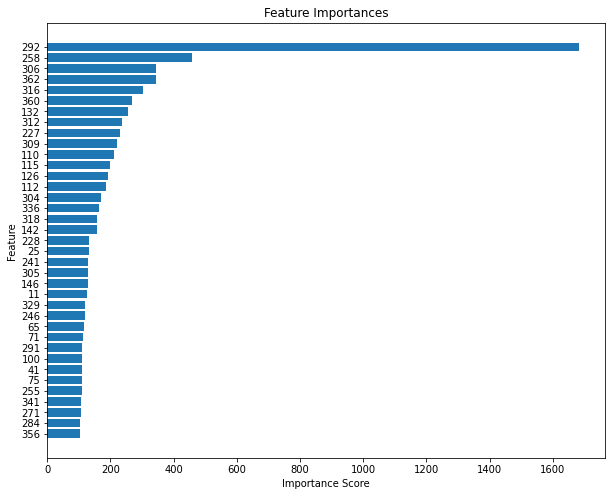

In [59]:
import matplotlib.pyplot as plt

feature_score_dict_chi2 = dict(sorted(feature_score_dict_chi2.items(), key=lambda x:x[1]))

plt.figure(figsize = (10, 8))
plt.barh(range(len(feature_score_dict_chi2.keys())), feature_score_dict_chi2.values(), align='center')
plt.yticks(range(len(feature_score_dict_chi2.keys())), feature_score_dict_chi2.keys())
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [60]:
imp_dict_chi2 = {}
imp_df_chi2 = pd.DataFrame()
for idx in feature_score_dict_chi2.keys():
  imp_dict_chi2[X_train.columns[idx]] = feature_score_dict_chi2[idx]

imp_df_chi2['feature'] = imp_dict_chi2.keys()
imp_df_chi2['score'] = imp_dict_chi2.values()

imp_df_chi2[['question', 'desc']] = imp_df_chi2['feature'].str.split('_', expand = True)
imp_df_chi2.drop(columns = ['desc'], inplace = True)
imp_df_chi2 = imp_df_chi2[['feature', 'question', 'score']]

imp_df_chi2

,feature,question,score
0,"Q25_10,000 or more employees",Q25,102.370041
1,Q4_Spain,Q4,104.251691
2,Q4_Nigeria,Q4,106.706934
3,Q24_Academics/Education,Q24,107.093250
4,Q4_Germany,Q4,108.453046
5,Q18_3,Q18,108.666996
6,Q14_12,Q14,108.693612
7,Q21_3,Q21,108.855809
8,Q4_UK & Ireland,Q4,109.525089
9,Q17_13,Q17,113.345854


In [61]:
print(np.unique(imp_df_chi2['question']), '\n')
imp_df_chi2['question'].value_counts()

['Q11' 'Q12' 'Q13' 'Q14' 'Q16' 'Q17' 'Q18' 'Q2' 'Q21' 'Q23' 'Q24' 'Q25'
 'Q27' 'Q28' 'Q31' 'Q33' 'Q34' 'Q35' 'Q4'] 



Q4     8
Q11    4
Q16    3
Q35    2
Q23    2
Q28    2
Q2     2
Q27    2
Q17    2
Q12    1
Q21    1
Q13    1
Q14    1
Q18    1
Q24    1
Q33    1
Q31    1
Q34    1
Q25    1
Name: question, dtype: int64

## Mutual Information Feature Selection

In [62]:
# Feature selection using information gain
from sklearn.feature_selection import mutual_info_classif

def fs_minfo(X_train, y_train, X_test):
 minfo_fs = SelectKBest(score_func=mutual_info_classif, k='all')
 minfo_fs.fit(X_train, y_train)
 X_train_fs = minfo_fs.transform(X_train)
 X_test_fs = minfo_fs.transform(X_test)
 return X_train_fs, X_test_fs, minfo_fs

In [63]:
X_train_fs, X_test_fs, minfo_fs = fs_minfo(X_train, y_train, X_test)

In [64]:
print(np.min(minfo_fs.scores_), np.max(minfo_fs.scores_))
percentile_90_minfo = np.percentile(minfo_fs.scores_, 90)

top_10_percentile_values = minfo_fs.scores_[minfo_fs.scores_ >= percentile_90_minfo]
top_10_percentile_values.shape

0.0 0.1914899243206003


(37,)

In [65]:
feature_score_dict_minfo = {}

for i in range(len(minfo_fs.scores_)):
  if minfo_fs.scores_[i] >= percentile_90_minfo:
    feature_score_dict_minfo[i] = minfo_fs.scores_[i]
    # print('Feature %d: %f' % (i, minfo_fs.scores_[i]))

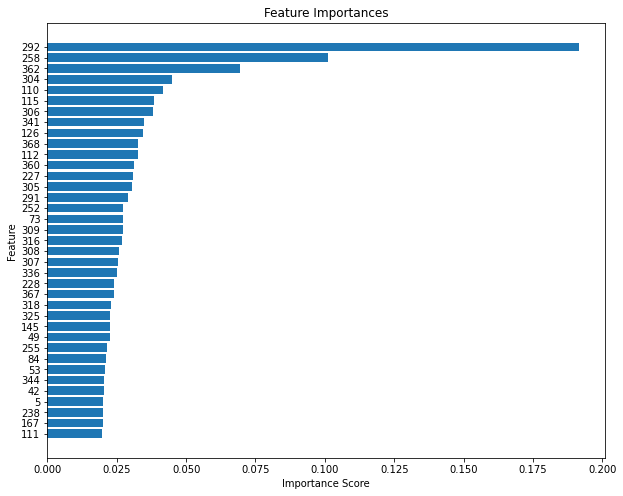

In [66]:
import matplotlib.pyplot as plt

feature_score_dict_minfo = dict(sorted(feature_score_dict_minfo.items(), key=lambda x:x[1]))

plt.figure(figsize = (10, 8))
plt.barh(range(len(feature_score_dict_minfo.keys())), feature_score_dict_minfo.values(), align='center')
plt.yticks(range(len(feature_score_dict_minfo.keys())), feature_score_dict_minfo.keys())
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [67]:
imp_dict_minfo = {}
imp_df_minfo = pd.DataFrame()
for idx in feature_score_dict_minfo.keys():
  imp_dict_minfo[X_train.columns[idx]] = feature_score_dict_minfo[idx]

imp_df_minfo['feature'] = imp_dict_minfo.keys()
imp_df_minfo['score'] = imp_dict_minfo.values()

imp_df_minfo[['question', 'desc']] = imp_df_minfo['feature'].str.split('_', expand = True)
imp_df_minfo.drop(columns = ['desc'], inplace = True)
imp_df_minfo = imp_df_minfo[['feature', 'question', 'score']]

imp_df_minfo

,feature,question,score
0,Q28_4,Q28,0.019831
1,Q37_2,Q37,0.019910
2,Q3_Woman,Q3,0.020232
3,Q12_3,Q12,0.020239
4,Q14_13,Q14,0.020405
5,Q24_Computers/Technology,Q24,0.020468
6,Q15_9,Q15,0.020801
7,Q18_12,Q18,0.021054
8,Q4_Germany,Q4,0.021545
9,Q15_5,Q15,0.022504


In [68]:
print(np.unique(imp_df_minfo['question']), '\n')
imp_df_minfo['question'].value_counts()

['Q11' 'Q12' 'Q14' 'Q15' 'Q16' 'Q18' 'Q2' 'Q22' 'Q23' 'Q24' 'Q27' 'Q28'
 'Q3' 'Q31' 'Q33' 'Q35' 'Q37' 'Q4' 'Q43'] 



Q11    6
Q4     5
Q28    3
Q43    2
Q27    2
Q24    2
Q15    2
Q18    2
Q2     2
Q16    2
Q33    1
Q23    1
Q35    1
Q22    1
Q37    1
Q14    1
Q12    1
Q3     1
Q31    1
Name: question, dtype: int64

## Selecting the Features

In [73]:
training_features = imp_df_minfo['feature'].to_list()
training_features

['Q28_4',
 'Q37_2',
 'Q3_Woman',
 'Q12_3',
 'Q14_13',
 'Q24_Computers/Technology',
 'Q15_9',
 'Q18_12',
 'Q4_Germany',
 'Q15_5',
 'Q35_9',
 'Q22_ PyTorch Hub ',
 'Q16_Under 1 year',
 'Q43_More than 25 times',
 'Q2_25-29',
 'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
 'Q11_3-5 years',
 'Q11_5-10 years',
 'Q16_5-10 years',
 'Q11_< 1 years',
 'Q18_1',
 'Q4_Egypt',
 'Q4_UK & Ireland',
 'Q11_10-20 years',
 'Q2_22-24',
 'Q27_No (we do not use ML methods)',
 'Q28_5',
 'Q43_Never',
 'Q33_1',
 'Q24_Academics/Education',
 'Q11_20+ years',
 'Q31_1',
 'Q28_3',
 'Q11_1-3 years',
 'Q27_We have well established ML methods (i.e., models in production for more than 2 years)',
 'Q4_India',
 'Q4_USA']

In [76]:
X_train_final = X_train[training_features]
X_train_final

,Q28_4,Q37_2,Q3_Woman,Q12_3,Q14_13,Q24_Computers/Technology,Q15_9,Q18_12,Q4_Germany,Q15_5,...,Q43_Never,Q33_1,Q24_Academics/Education,Q11_20+ years,Q31_1,Q28_3,Q11_1-3 years,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)",Q4_India,Q4_USA
958,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3975,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7463,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7508,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7753,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [78]:
X_test_final = X_test[training_features]
X_test_final

,Q28_4,Q37_2,Q3_Woman,Q12_3,Q14_13,Q24_Computers/Technology,Q15_9,Q18_12,Q4_Germany,Q15_5,...,Q43_Never,Q33_1,Q24_Academics/Education,Q11_20+ years,Q31_1,Q28_3,Q11_1-3 years,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)",Q4_India,Q4_USA
6912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6742,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2168,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7109,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1543,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Implementing Ordinal Logistic Regression